# Inference: Neal Langevin MCMC

This example shows you how to perform Bayesian inference on a Gaussian distribution and a time-series problem, using [Neal Langevin MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).


First, we create a simple normal distribution

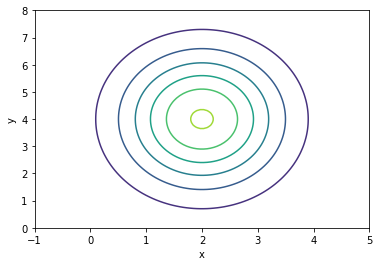

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
mean = [2, 4]
cov = [[1, 0], [0, 3]]
log_pdf = pints.toy.GaussianLogPDF(mean, cov)

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-1, 5, num_points)
y = np.linspace(-0, 8, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now we set up and run a sampling routine using the Neal Langevin MCMC

In [42]:
# Choose starting points for 3 mcmc chains
xs = [
    [2, 1],
    [3, 3],
    [5, 4],
]

# Set a standard deviation, to give the method a sense of scale
#sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.NealLangevinMCMC)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.7)
    sampler.set_alpha(0.95)
    sampler.set_delta(mean=0.05)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Neal Langevin MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.333     0.333     0.333      0:00.0
2     9      0.5       0.5       0.5        0:00.0
3     12     0.6       0.6       0.6        0:00.0
100   303    0.971     0.971     0.971      0:00.1
200   603    0.980198  0.975     0.980198   0:00.2
300   903    0.983     0.983     0.98       0:00.3
400   1203   0.988     0.983     0.983      0:00.4
500   1503   0.988     0.984     0.986      0:00.5
600   1803   0.988     0.983     0.985      0:00.6
700   2103   0.988604  0.982906  0.984      0:00.7
800   2403   0.988     0.985     0.984      0:00.8
900   2703   0.987     0.986     0.983      0:00.9
1000  3003   0.988024  0.986     0.984      0:00.9
1100  3303   0.987     0.985     0.984      0:01.0
1200  3603   0.987     0.986     0.984193   0:01.1
1300  3903   0.986     0.986     0.983871   0:01

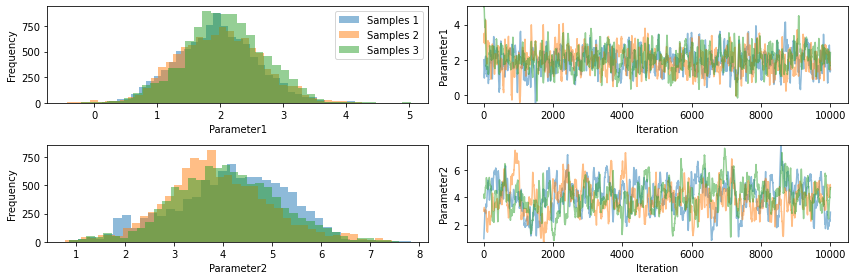

In [43]:
# Show traces and histograms
import pints.plot
pints.plot.trace(full_chains)
plt.show()

R-hat:
[1.0077307578390067, 1.0221138333768778]
0.29250910208232095
0.30526517161638145
0.32051958259502156


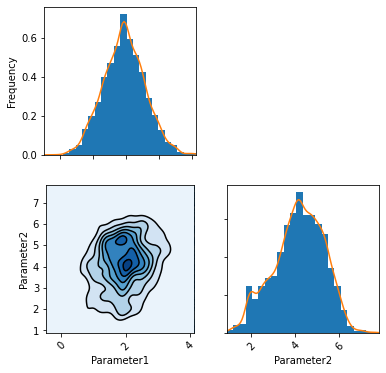

In [44]:
# Discard warm up
chains = full_chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

## Neal Langevin MCMC on heavily correlated Gaussian 

We now try the same method on a heavily correlated problem

In [ ]:
# Create log pdf
mean = [2, 4]
cov = [[1, 10], [10, 3]]
log_pdf = pints.toy.GaussianLogPDF(mean, cov)

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-1, 5, num_points)
y = np.linspace(-0, 8, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()